## 분류 평가

분류 모델 평가 지표

정확도(Accuracy), 정밀도(Precision), 재현율(Recall), F1 Score, ROC AUC. 이러한 지표들은 모델의 성능을 다양한 관점에서 평가하는 데 중요.

정확도 (Accuracy):
- 정확도는 가장 직관적인 분류 성능 평가 지표. 모델이 전체 데이터 중 얼마나 정확하게 예측했는지를 나타낸다.
- 계산 방법: (정확히 예측된 데이터의 수) / (전체 데이터의 수)
- (TP + TN) / (TP + TN + FP + FN)

정밀도 (Precision):
- 정밀도는 양성(Positive)으로 예측된 데이터 중 실제로 양성인 데이터의 비율. 즉, 모델이 '양성'이라고 예측한 것들 중 실제 '양성'인 경우의 비율.
- 계산 방법: TP / (TP + FP)
여기서 TP(True Positive)는 실제 양성을 양성으로 올바르게 예측한 경우, FP(False Positive)는 실제 음성을 잘못해서 양성으로 예측한 경우.  P: 예측 , 양성이 기준
- 양성으로 예측한게 정밀한 경우

재현율 (Recall) 또는 민감도 (Sensitivity):
- 재현율은 실제 양성인 데이터 중 모델이 양성으로 올바르게 예측한 데이터의 비율. 즉, 실제 '양성'인 경우들 중 모델이 얼마나 잘 잡아내는지를 나타낸다.
- 계산 방법: TP / (TP + FN)
여기서 FN(False Negative)는 실제 양성을 잘못해서 음성으로 예측한 경우.

F1 Score:
- F1 Score는 정밀도와 재현율의 조화 평균(harmonic mean). 모델이 양성 데이터를 얼마나 잘 예측하는지에 대한 전반적인 측정치로, 특히 불균형 데이터셋에서 유용.
- 계산 방법: 2 * (Precision * Recall) / (Precision + Recall)

ROC AUC (Receiver Operating Characteristic - Area Under Curve):
- ROC 곡선은 모델이 양성 클래스를 어떻게 잘 예측하는지에 대한 성능을 그래프로 나타낸 것. 이 곡선은 재현율과 1-특이성(실제 음성 중 잘못 양성으로 예측한 비율)의 관계를 나타낸다.
- AUC(Area Under the ROC Curve) 값은 ROC 곡선 아래의 면적을 의미하며, 이 값이 클수록 모델의 성능이 좋다고 평가. AUC는 0과 1 사이의 값을 가지며, 1에 가까울수록 더 좋은 모델.


* TP, FP, FN, TN는 예측 클래스와 실제 클래스의 Positive 결정 값과 Negative 결정 값의 결합에 따라 결정
* 앞문자 True/False는 예측값과 실제값이 같은가/틀린가를 의미하고 뒤 문자 Negative/Positive는 예측 결과 값이 부정/긍정을 의미
* TN는 예측값을 Negative 값 0으로 예측했고 실제값 역시 Negative 값 0
* FP는 예측값을 Positive 값 1로 예측했고 실제값은 Negative 값 0
* FN은 예측값을 Negative 값 0으로 예측했고 실제값은 Positive 값 1
* TP는 예측값을 Positive 값 1로 예측했고 실제값 역시 Positive 값 1
* 정확도 = (TP + TN) / ( TP + TN + FP + FN)
* 정밀도 = TP / ( TP + FP)
* 재현율 = TP / ( TP + FN) : 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 높아짐.
* F1 = 2 * ( 정밀도 * 재현율) / (정밀도 + 재현율)
* 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
* 재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우(ex. 보험사기, 암진단)
* 정밀도가 더 중요한 지표인 사례는 스팸 메일 여부를 판단하는 경우로 스팸 메일이 아닌데 스팸 메일로 분류해서 업무 차질 발생


#### 정밀도/제현율 트레이드오프
* 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있음
* 정밀도와 재현율은 한쪽을 높이면 다른 하나의 수치는 낮아지므로 트레이드오프(Trade-off) 관계임

#### 예측 확률을 반환하는 predict_proba()
* 사이킷런 분류 알고리즘은 예측 데이터가 특정 레이블(결정 클래스 값)에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구함
* 그리고 예측 확률이 큰 레이블 값으로 예측
* 이진 분류 모델에서 특정 데이터가 0이 될 확률이 10%, 1이 될 확률이 90%로 예측되었다면 최종 예측은 더 큰 확률을 가진 1로 예측
* 이진 분류에서는 이 임곗값을 0.5로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정함
* 사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_prob()를 제공 - 학습이 완료된 사이킷런 Classifier 객체에서 호출
* predict() 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스값이 아닌 예측 확률 결과임

In [3]:
# 일괄 전처리 사용자 함수(null 처리, 불필요 칼럼 삭제, 레이블 인코딩)
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
# Age(평균), Cabin('N'), Embarked('N'), Fare(0)
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
# PassengerId, Name, Ticket(티켓번호)
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행.
# Cabin(선실번호 첫문자만 추출 후 인코딩), Sex(성별), Embarked(중간 정착 항구)
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
from re import X
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('/content/drive/MyDrive/kdt_240424/M5_머신러닝/dataset/train (1).csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                            test_size=0.2, random_state=11)
# lbfgs는 "Limited-memory Broybn-Fletcher-Goldfarb-Shanno의 약자로 메모리 사용량을 줄이는데 최적화"
lr_clf = LogisticRegression(max_iter=500, solver='lbfgs', random_state=42)

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

accuracy_lr = accuracy_score(y_test, pred)
print(round(accuracy_lr,4))
# len(X_test)

0.8492


In [12]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba[:3]

array([[0.4621693 , 0.5378307 ],
       [0.87879062, 0.12120938],
       [0.87724729, 0.12275271]])

In [13]:
pred = lr_clf.predict(X_test)
print(pred[:3])
pred.reshape(-1,1)[:3]

[1 0 0]


array([[1],
       [0],
       [0]])

In [15]:
import numpy as np
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)], axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])
type(pred_proba_result)

두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.4621693  0.5378307  1.        ]
 [0.87879062 0.12120938 0.        ]
 [0.87724729 0.12275271 0.        ]]


numpy.ndarray

In [16]:
# 사이킷런은 분류 결정 임곗값을 조절해 정밀도와 재현율의 성능 수치를 상호 보완적으로 조정
# threshold 변수를 특정 값으로 설정하고 사이킷런의 Binarizer 클래스 객채로 생성
# fit_transform() 매서드를 이용해 넘파이 ndarray를 입력하면 입력된 ndarray 의 값이
# threshold 보다 같거나 작으면 0, 크면 1값 반환

from sklearn.preprocessing import Binarizer

X = [[ 1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0, 크면 1반환
Binarizer = Binarizer(threshold=1.1)
print(Binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [28]:
# 생존 확률을 선택해서 임곗값 0.5를 기준과 비교하여 예측

from sklearn.preprocessing import Binarizer
custom_treshold = 0.12
print('pred_proba: \n', pred_proba[0:5])
print()
# 생존 확률 추룰 후 2차원 배열오 변환
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
# pred_proba_1 = pred_proba[:,1]
print('생존확률: \n', pred_proba_1[0:5] )
print()
binarizer = Binarizer(threshold=custom_treshold)
custom_predict = binarizer.fit_transform(pred_proba_1)
print('예측값: \n', custom_predict[0:5])

pred_proba: 
 [[0.4621693  0.5378307 ]
 [0.87879062 0.12120938]
 [0.87724729 0.12275271]
 [0.88248085 0.11751915]
 [0.85524966 0.14475034]]

생존확률: 
 [[0.5378307 ]
 [0.12120938]
 [0.12275271]
 [0.11751915]
 [0.14475034]]

예측값: 
 [[1.]
 [1.]
 [1.]
 [0.]
 [1.]]


In [33]:
# get_clf_eval 평가 사용자 정의 함수
from sklearn.metrics import accuracy_score, precision_score , recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 score: {3:.4f}'.format(accuracy, precision, recall, f1))

get_clf_eval(y_test, custom_predict)

오차 행렬
[[43 75]
 [ 2 59]]
정확도: 0.5698, 정밀도: 0.4403, 재현율: 0.9672, F1 score: 0.6051


In [ ]:
TN FN
FP TP

In [40]:
# 정확도 = (TP + TN) / ( TP + TN + FP + FN)

TN=43;TP=75;FP=2;FN=59
accuracy = (TP+TN)/(TP+TN+FP+FN)
round(accuracy,4)

0.6592

In [41]:
# 오차 행렬을 통해 직접 지표 계산

TN=43;TP=75;FP=2;FN=59

accuracy = accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP / ( TP + FP)
recall = TP / ( TP + FN)
F1 = 2 * ( precision * recall) / (precision + recall)
print(f'정확도: {round(accuracy,2)}, 정밀도: {round(precision,2)}, 재현율: {round(recall,2)}, F1 score: {round(F1,2)}')

정확도: 0.66, 정밀도: 0.97, 재현율: 0.56, F1 score: 0.71


Q. pred와 y_test를 배열로 만든 후 동일한 인덱스에서 0이 일치하는 경우와 1이 모두 일치하는 경우의 수를 산출

In [43]:
import numpy as np

# 예시 배열 생성

array1 = pred
array2 = y_test.values

# 동일한 인덱스에서 0이 모두 일치하는 경우의 수

matching_zeros = np.sum((array1 == 0) & (array2 == 0))

# 동일한 인덱스에서 1이 모두 일치하는 경우의 수
matching_ones = np.sum((array1 == 1) & (array2 == 1))

matching_zeros, matching_ones

(104, 48)

Q. 오차 행렬을 통해 직접 수작업으로 지표 계산

In [ ]:
pred_proba[:,1]

In [46]:
# 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준
# 임곗값을 낮출수록 Positive 예측값이 많아지면 FN은 하락해서 재현율은 올라가고 FP는 증가해서 정밀도는 내려간다
# Binarizer의 threshold 설정값을 0.4로 설정 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤

custom_treshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_treshold)
custom_predict = binarizer.fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1 score: 0.7727


In [47]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행
    for custom_treshold in thresholds:
        binarizer = Binarizer(threshold=custom_treshold)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_treshold)

        get_clf_eval(y_test , custom_predict)
        print()
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1 score: 0.7727

임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1 score: 0.7840

임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1 score: 0.7805

임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1 score: 0.7931

임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1 score: 0.8036



[0.011598372575398511, 0.05287340486279165, 0.06227561122938843, 0.06364094783971665, 0.0686219662613237, 0.07092890650201744, 0.07234603067485273, 0.07413043607846309, 0.07562166741024949, 0.07566661784879643, 0.08333212396669866, 0.09120100650915934, 0.091560651397997, 0.09157987900451375, 0.09435725208266034, 0.09452239940304241, 0.09619244530116186, 0.09746243943307457, 0.10030355036400172, 0.10063186552225592, 0.10064163243131444, 0.10112568271596792, 0.1038279558108009, 0.10383019258726989, 0.10385528934347624, 0.10784254995723651, 0.10879460682559956, 0.11147917332518803, 0.11151614267240531, 0.11152497156250002, 0.1118948212509743, 0.11192928031694493, 0.11612275854688298, 0.11715367846517333, 0.1175191524613993, 0.11787278700417052, 0.11796405770966477, 0.12120937604354148, 0.12269827596483582, 0.122752713414334, 0.12275375259392679, 0.12275868102173296, 0.12447908787914164, 0.1248381432704732, 0.1253963060334748, 0.12682307771233894, 0.1282555250281109, 0.12872407433542024, 0

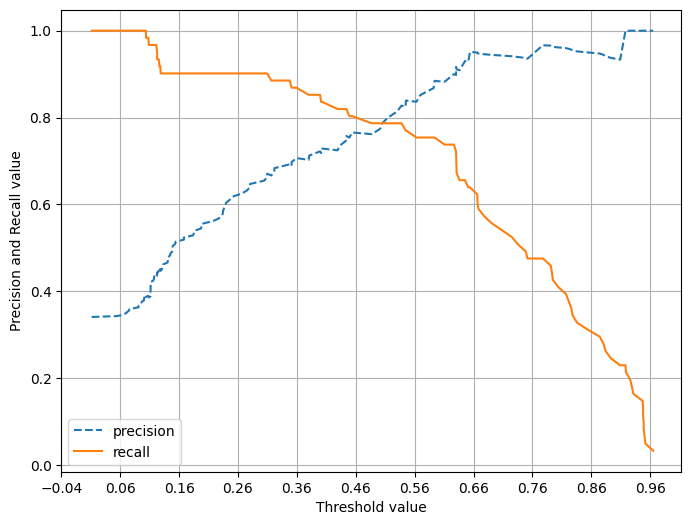

In [51]:
# precision_recall_curve() API는 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태의 그래프로
# 시각화 하는데 이용

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray추출
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    print(list(thresholds))
    print(thresholds.shape)
    threshold_boundary = thresholds.shape[0]
    print(threshold_boundary)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X축의 Scaler을 0.1단위로 변경
    start, end = plt.xlim() # 플롯의 x축의 현재 한계를 반환
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1])

#### 결과 해석
* 임계값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 낮아짐.(FN이 작아지고 FP가 커짐)
* 로지스틱 회귀 기반의 타이타닉 생존자 예측 모델의 경우 임곗값이 약 0.5 지점에서 재현율과 정밀도가 비슷해지는 모습을 보임.
* 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용하는 것은 지양하고 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용

#### 정밀도 및 재현율 활용시 유의 사항
* 정밀도와 재현율 성능 수치는 어느 한쪽만 참조하면 극단적인 수치 조작이 가능
* 정밀도 100%가 되는 방법:
  확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측
  전체 환자 1000명중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면 이 한 명만 P로 예측하고 나머지는 모두 N으로 예측
  FP는 0, TP는 1이 되며 정밀도(TP/(TP+FP)는 1/(1+0) = 1
* 재현율이 100%가 되는 방법:
  모든 환자를 Positive로 예측
  1000명의 환자중 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고 FN은 0이므로 재현율(TP/(TP+FN)은 30/(30+0) = 1
* 분류가 정밀도, 재현율 중 하나에 상대적인 중요도를 부여할 수 있지만 하나만 강조해서는 안됨
* 암 예측 모델에서 재현율을 높인다고 주로 양성만 판정한다면 환자의 부담과 불평이 커지게 됨

In [52]:
# F1 스코어는 정밀도와 재현율을 결합한 지표 : 정밀도와 재현율의 균형이 필요한 경우: 특히 클래스 불균형이 있을때 유용
# F1 스코어는 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 상대적으로 높은 값을 가짐

from sklearn.metrics import f1_score
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


#### ROC 곡선과 AUC
* 수신자 판단 곡선이라고 하며 ML의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표.
* FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선으로 FPR은 1- 특이성(TNR), (TN + FP)/(TN + FP) - TN/(TN+FP) = FP/(TN+FP), TPR은 재현율(민감도)를 나타냄.
* 특이성은 실제로 음성인 사례들 중에서 모델이 음성으로 예측한 사례의 비율
* TNR은 TN/(TN+FP)이며 FPR은 FP/(TN+FP)임
* ROC 곡선은 FPR을 0부터 1까지 변경하면서 FPR을 구하고 이 FPR값의 변화에 따른 TPR의 변화 값을 구함.
* FPR을 0에서 1까지 변경하는 것은 Positive 예측값을 결정하는 기준인 분류 결정 임곗값을 변경하면 됨.
* FPR을 0으로 만들려면 임곗값을 1로 지정하고 반대로 FPR을 1로 만들려면 임곗값을 0으로 지정하면 됨.

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
titanic_df = pd.read_csv('/content/drive/MyDrive/kdt_240424/M5_머신러닝/dataset/train (1).csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = \
                        train_test_split(X_titanic_df, y_titanic_df, test_size= 0.20, random_state=11)
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, pred)
accuracy_lr

0.8491620111731844

In [58]:
from sklearn.metrics import roc_curve
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
thr_index = np.arange(1, thresholds. shape[0],5)
print(thr_index)
print(np.round(thresholds[thr_index],2))
print(np.round(fprs[thr_index],2))
print(np.round(tprs[thr_index],2))

[ 1  6 11 16 21 26 31 36 41 46 51]
[0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
[0.   0.02 0.03 0.08 0.13 0.17 0.2  0.47 0.58 0.69 0.8 ]
[0.03 0.64 0.72 0.75 0.8  0.84 0.89 0.9  0.93 0.97 0.98]


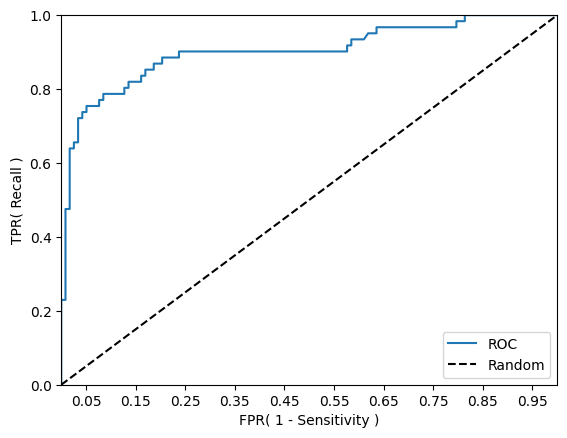

In [60]:
# ROC_Curve는 임곗값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커지는데
# FPR이 조금씩 커질때 TPR은 가파르게 커짐을 알 수 있음
# AUC가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건
# 가운데 대각선 직선은 랜덤 수준의 이진 분류 AUC 값으로 0.5이며 일반적으로 분류는 0.5 이상의 AUC값을 가짐

import matplotlib.pyplot as plt
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test , pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    # FPR X축의 Scale을 0.1 단위로 변경, X,Y 축명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [61]:
# ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는데 이용하며
# 분류의 성능 지표로 사용되는 것은 ROC곡선이며 면적에 기반한 AUC값으로 결정
# AUC값은 ROC 곡선 밑의 면적을 구한것으로서 일반적으로 1에 가까울수록 좋은 수치임
# AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을수 있느냐가 관건

from  sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1].reshape(-1,1)
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9024


In [65]:
from sklearn.metrics import roc_auc_score, precision_score , recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}),\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869),    F1: 0.7805, AUC:0.9024


In [67]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# 데이터 생성
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=15, random_state=42)
print(X.shape)

# 데이터 분할

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련

model = RandomForestClassifier()
model.fit(X_train, y_train)

# 예측 확률

y_score = model.predict_proba(X_test)

# 다중 클래스 라벨을 이진화

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# ROC AUC 계산 (ovR 방식)

roc_auc_ovr = roc_auc_score(y_test_binarized, y_score, multi_class='ovr')

print(f"ROC AUC (One-vs-Rest): {roc_auc_ovr}")


(1000, 20)
ROC AUC (One-vs-Rest): 0.8847733197784952
